# Programming Projects

**Names:**

**Vamshi Jaligama**


In [48]:
! env TZ=America/Detroit date

Mon Dec 12 16:09:03 EST 2022


# Programming Project 4

Develop a demonstration for clustering.

**Clustering:** 

Clustering is the process of grouping a set of data objects into multiple groups or clus-
ters so that objects within a cluster have high similarity, but are very dissimilar to objects
in other clusters. Dissimilarities and similarities are assessed based on the attribute val-
ues describing the objects and often involve distance measures. Clustering as a data
mining tool has its roots in many application areas such as biology, security, business
intelligence, and Web search.

**Cluster Analysis:**

Finding similarities between data according to the characteristics found in the data and grouping similar data objects into clusters.

**Uses of Cluster Analysis:**

->	**Biology:** taxonomy of living things: kingdom, phylum, class, order, family, genus and species

-> **Information retrieval:** document clustering

-> **Land use:** Identification of areas of similar land use in an earth observation database

-> **Marketing:** Help marketers discover distinct groups in their customer bases, and then use this knowledge to develop targeted marketing programs

-> **City-planning:** Identifying groups of houses according to their house type, value, and geographical location

-> **Earth-quake studies:** Observed earth quake epicenters should be clustered along continent faults

-> **Climate:** understanding earth climate, find patterns of atmospheric and ocean

-> Economic Science: market resarch


**Quality of Clustering:**

A good clustering method will produce high quality clusters

**high intra-class similarity:** cohesive within clusters

**low inter-class similarity:** distinctive between clusters


**The quality of a clustering method depends on
the similarity measure used by the method 
its implementation, and
Its ability to discover some or all of the hidden patterns**

**Requirements for Cluster Analysis**

**Scalability:**

Clustering all the data instead of only on samples

**Ability to deal with different types of attributes:**

Numerical, binary, categorical, ordinal, linked, and mixture of these 

**Constraint-based clustering:**

User may give inputs on constraints
Use domain knowledge to determine input parameters

**Interpretability and usability:**

**Others:** 

Discovery of clusters with arbitrary shape

Ability to deal with noisy data

Incremental clustering and insensitivity to input order

High dimensionality



**Major Clustering Approaches:**

**Partitioning approach:** 
Construct various partitions and then evaluate them by some criterion, e.g., minimizing the sum of square errors

**Typical methods:** k-means, k-medoids, CLARANS

**Hierarchical approach:** 

Create a hierarchical decomposition of the set of data (or objects) using some criterion

**Typical methods:** Diana, Agnes, BIRCH, CAMELEON

**Density-based approach:**

Based on connectivity and density functions

**Typical methods:** DBSACN, OPTICS, DenClue

**Grid-based approach:**

based on a multiple-level granularity structure

**Typical methods:** STING, WaveCluster, CLIQUE

**Model-based:**
A model is hypothesized for each of the clusters and tries to find the best fit of that model to each other

**Typical methods:** EM, SOM, COBWEB

**Frequent pattern-based:**

Based on the analysis of frequent patterns

**Typical methods:** p-Cluster

**User-guided or constraint-based**: 

Clustering by considering user-specified or application-specific constraints
Typical methods: COD (obstacles), constrained clustering

**Link-based clustering:**

Objects are often linked together in various ways
Massive links can be used to cluster objects: SimRank, LinkClus



**Partitioning method:** Partitioning a database D of n objects into a set of k clusters, such that the sum of squared distances is minimized (where ci is the centroid or medoid of cluster Ci)

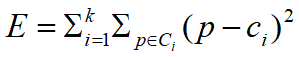

Given k, find a partition of k clusters that optimizes the chosen partitioning criterion

**Global optimal:** exhaustively enumerate all partitions

**Heuristic methods:** k-means and k-medoids algorithms

**k-means:** Each cluster is represented by the center of the cluster

**k-medoids or PAM (Partition around medoids):** Each cluster is represented by one of the objects in the cluster  



**Algorithm steps Of K Means**

The working of the K-Means algorithm is explained in the below steps:

Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: place a new centroid of each cluster.

Step-5: Repeat step no.3, which reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

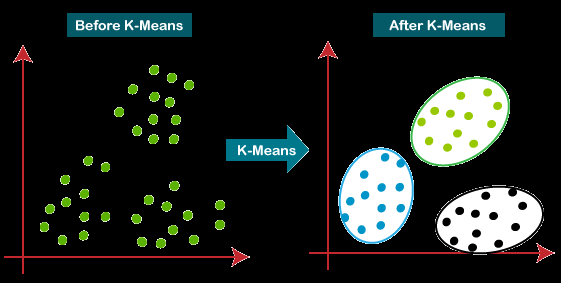

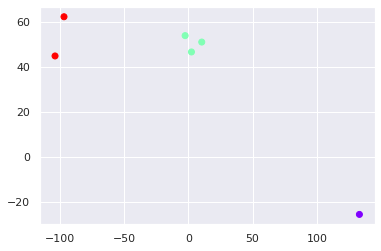

In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_csv('/content/Countryclusters.csv')
data

x = data.iloc[:,1:3] # 1t for rows and second for columns
x

kmeans = KMeans(3)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

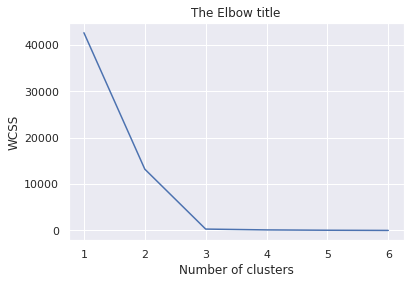

In [50]:
wcss=[]

for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**Hierarchical Clustering:**

A hierarchical clustering
method works by grouping data objects into a hierarchy or “tree” of clusters.

**Types of Hierarchical Clustering**

There are mainly two types of hierarchical clustering:

Agglomerative hierarchical clustering

Divisive Hierarchical clustering




**Agglomerative Hierarchical Clustering:**

We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning:
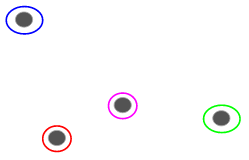

Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left:

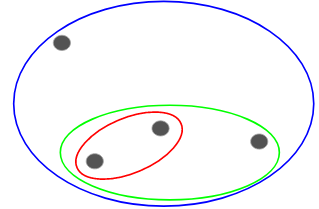

We are merging (or adding) the clusters at each step, right? Hence, this type of clustering is also known as additive hierarchical clustering.

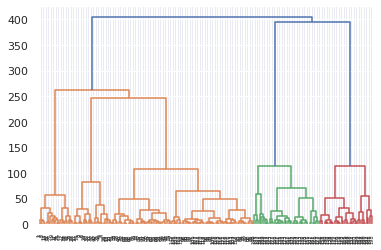

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dataset = pd.read_csv('/content/data.csv')

X = dataset.iloc[:, [3, 4]].values

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

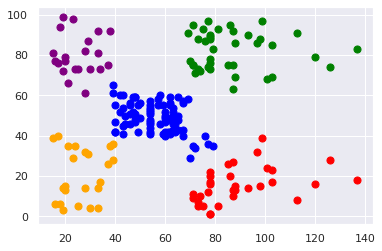

In [52]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

**Divisive Hierarchical Clustering**

Divisive hierarchical clustering works in the opposite way. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster.

So, it doesn’t matter if we have 10 or 1000 data points. All these points will belong to the same cluster at the beginning:

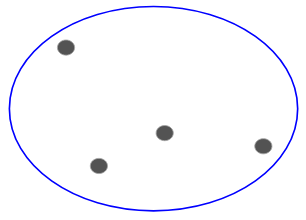

Now, at each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point:

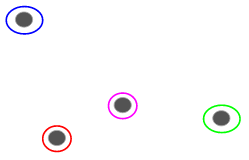

We are splitting (or dividing) the clusters at each step, hence the name divisive hierarchical clustering.

Agglomerative Clustering is widely used in the industry and that will be the focus in this article. Divisive hierarchical clustering will be a piece of cake once we have a handle on the agglomerative type.

Given a dataset (d1, d2, d3, ....dN) of size N
at the top we have all data in one cluster
the cluster is split using a flat clustering method eg. K-Means etc
repeat
choose the best cluster among all the clusters to split
split that cluster by the flat clustering algorithm
until each data is in its own singleton cluster

**Density-Based Clustering Methods:**

Clustering based on density (local cluster criterion), such as density-connected points

**Major features:**

Discover clusters of arbitrary shape
Handle noise
One scan
Need density parameters as termination condition



**DBSCAN:** Density-Based Spatial Clustering of Applications with Noise:

Relies on a density-based notion of cluster:  A cluster is defined as a maximal set of density-connected points

Discovers clusters of arbitrary shape in spatial databases with noise

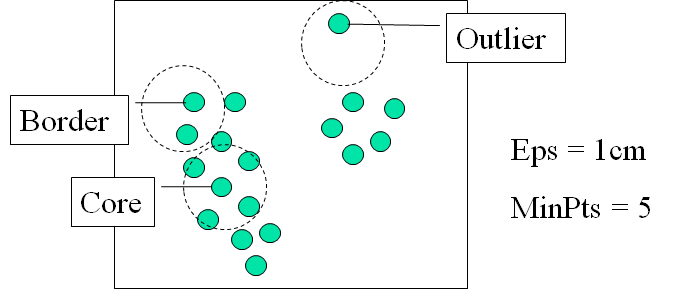

Arbitrary select a point p

Retrieve all points density-reachable from p w.r.t. Eps and MinPts

If p is a core point, a cluster is formed

If p is a border point, no points are density-reachable from p and DBSCAN visits the next point of the database

Continue the process until all of the points have been processed




**OPTICS:  A Cluster-Ordering Method:**

**OPTICS:** Ordering Points To Identify the Clustering Structure

Produces a special order of the database wrt its density-based clustering structure  

This cluster-ordering contains info equiv to the density-based clusterings corresponding to a broad range of parameter settings
Good for both automatic and interactive cluster analysis, including finding intrinsic clustering structure

Can be represented graphically or using visualization techniques



[-1  0 -1  0 -1 -1 -1  2 -1 -1  1 -1  2 -1 -1  2  2  3  1 -1 -1  3  2  1
  1 -1  3  2 -1 -1 -1  0 -1 -1  0 -1  0 -1  1  3 -1  1 -1 -1  1  1  0  1
  0 -1  1  3 -1  3 -1  1 -1 -1  0  3 -1  2 -1  1  1  1 -1  3 -1  1  2 -1
  0  1 -1  0  1  2  3  0 -1  2 -1  3  0 -1  3  2 -1  0  2  3 -1  1  1 -1
 -1  3 -1 -1 -1 -1 -1  3  2  3 -1  2 -1 -1 -1  1  3 -1  3 -1  0 -1 -1 -1
 -1  3  1  3 -1  3  3  1 -1  1 -1  1  1 -1  0 -1 -1  0 -1 -1 -1  1 -1 -1
 -1  1  0 -1  0  0  0  2 -1  2 -1  1  0  1  3  2 -1  2  2 -1  2 -1 -1 -1
 -1 -1  2  0  3 -1 -1  0 -1  3  2  1  3 -1  1  1  2  2 -1  2 -1  0 -1  1
  2  2  1  1 -1 -1  1  0 -1  1 -1  1 -1 -1  1 -1  2 -1  2  1 -1 -1  0  1
  1  3 -1  2  0  3  3 -1 -1 -1 -1 -1  0 -1  2 -1  2 -1  1  2  3  1 -1  1
 -1  2 -1  0  0  0  0  1  1 -1 -1  1  3  2  1 -1 -1 -1  3  0  2  2 -1  3
 -1  1 -1 -1 -1  3  3 -1  1 -1 -1 -1 -1 -1  0  0 -1  3 -1  3  3 -1  0 -1
 -1  2 -1  3  0 -1  0 -1 -1  2 -1  1]
['y', 'b', 'g', 'r']


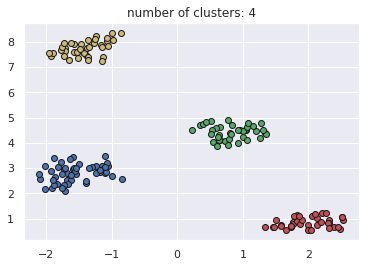

Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31


In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
					cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(labels)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

#evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f"%ari)

#Programming Project 5

Develop a demonstration for a outlier detection.



**Outlier:** A data object that deviates significantly from the normal objects as if it were generated by a different mechanism

Ex.:  Unusual credit card purchase, sports: Michael Jordon, Wayne Gretzky, ...
Outliers are different from the noise data 

Noise is random error or variance in a measured variable

Noise should be removed before outlier detection

Outliers are interesting:  It violates the mechanism that generates the normal data

Outlier detection vs. novelty detection: early stage, outlier; but later merged into the model

**Applications:**

Credit card fraud detection

Telecom fraud detection

Customer segmentation

Medical analysis

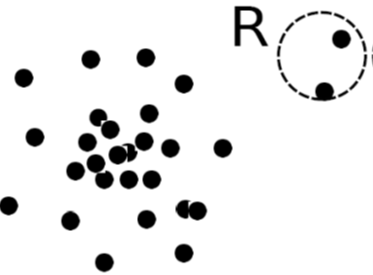





**Types of outliers:**

Three kinds: global, contextual and collective outliers

**Global outlier**  (or point anomaly)

Object is Og if it significantly deviates from the rest of the data set.

Ex. Intrusion detection in computer networks

Issue: Find an appropriate measurement of deviation


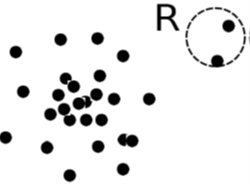


**Contextual outlier** (or conditional outlier)

Object is Oc if it deviates significantly based on a selected context

Ex. 80o F in Urbana: outlier? (depending on summer or winter?)

Attributes of data objects should be divided into two groups 

Contextual attributes: defines the context, e.g., time & location 

Behavioral attributes:  characteristics of the object, used in outlier evaluation, e.g., temperature

Can be viewed as a generalization of local outliers—whose density significantly deviates from its local area

Issue: How to define or formulate meaningful context?









**Collective Outliers:**

A subset of data objects collectively deviate significantly from the whole data set, even if the individual data objects may not be outliers

Applications: E.g., intrusion detection: 

When a number of computers keep sending denial-of-service packages to each other 

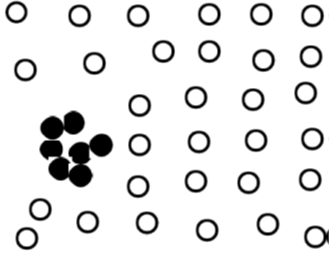


**Detection of collective outliers:**

Consider not only behavior of individual objects, but also that of groups of objects

Need to have the background knowledge on the relationship among data objects, such as a distance or similarity measure on objects.

A data set may have multiple types of outlier

One object may belong to more than one type of outlier





**Challenges of Outlier Detection:**

1) Modeling normal objects and outliers properly

Hard to enumerate all possible normal behaviors in an application

The border between normal and outlier objects is often a gray area

2) Application-specific outlier detection

Choice of distance measure among objects and the model of relationship among objects are often application-dependent

E.g., clinic data: a small deviation could be an outlier; while in marketing analysis, larger fluctuations

3) Handling noise in outlier detection

Noise may distort the normal objects and blur the distinction between normal objects and outliers. It may help hide outliers and reduce the effectiveness of outlier detection

4) Understandability

Understand why these are outliers: Justification of the detection

Specify the degree of an outlier: the unlikelihood of the object being generated by a normal mechanism




Two ways to categorize outlier detection methods: 

Based on whether user-labeled examples of outliers can be obtained: 
Supervised, semi-supervised vs. unsupervised methods

Based on assumptions about normal data and outliers:
Statistical, proximity-based, and clustering-based methods

**Outlier Detection I: Supervised Methods**

1) Modeling outlier detection as a classification problem:
Samples examined by domain experts used for training & testing

2) Methods for Learning a classifier for outlier detection effectively:
Model normal objects & report those not matching the model as outliers, or
Model outliers and treat those not matching the model as normal

3) Challenges: Imbalanced classes, i.e., outliers are rare: Boost the outlier class and make up some artificial outliers and 
Catch as many outliers as possible, i.e., recall is more important than accuracy (i.e., not mislabeling normal objects as outliers)



**Outlier Detection II: Unsupervised Methods:**

Assume the normal objects are somewhat ``clustered'‘ into multiple groups, each having some distinct features

An outlier is expected to be far away from any groups of normal objects

**Weakness:** Cannot detect collective outlier effectively

Normal objects may not share any strong patterns, but the collective outliers may share high similarity in a small area

Ex. In some intrusion or virus detection, normal activities are diverse
Unsupervised methods may have a high false positive rate but still miss many real outliers.
Supervised methods can be more effective, e.g., identify attacking some key resources

Many clustering methods can be adapted for unsupervised methods

Find clusters, then outliers: not belonging to any cluster

Problem 1: Hard to distinguish noise from outliers

Problem 2: Costly since first clustering: but far less outliers than normal objects 

Newer methods: tackle outliers directly



**Outlier Detection III: Semi-Supervised Methods:**

Situation: In many applications, the number of labeled data is often small: Labels could be on outliers only, normal objects only, or both

Semi-supervised outlier detection: Regarded as applications of semi-supervised learning

If some labeled normal objects are available
Use the labeled examples and the proximate unlabeled objects to train a model for normal objects

Those not fitting the model of normal objects are detected as outliers

If only some labeled outliers are available, a small number of labeled outliers many not cover the possible outliers well

To improve the quality of outlier detection, one can get help from models for normal objects learned from unsupervised methods 


**Outlier Detection (1): Statistical Methods:**

Statistical methods (also known as model-based methods) assume that the normal data follow some statistical model (a stochastic model)

The data not following the model are outliers.

Example (right figure): First use Gaussian distribution to model the normal data
For each object y in region R, estimate gD(y), the probability of y fits the Gaussian distribution

If gD(y) is very low, y is unlikely generated by the Gaussian model, thus an outlier

Effectiveness of statistical methods: highly depends on whether the assumption of statistical model holds in the real data.

There are rich alternatives to use various statistical models
E.g., parametric vs. non-parametric



**Outlier Detection (2): Proximity-Based Methods:**

An object is an outlier if the nearest neighbors of the object are far away, i.e., the proximity of the object is significantly deviates from the proximity of most of the other objects in the same data set

Example (right figure):  Model the proximity of an object using its 3 nearest neighbors
Objects in region R are substantially different from other objects in the data set.  
Thus the objects in R are outliers
The effectiveness of proximity-based methods highly relies on the proximity measure.  

In some applications, proximity or distance measures cannot be obtained easily.  

Often have a difficulty in finding a group of outliers which stay close to each other
Two major types of proximity-based outlier detection
Distance-based vs. density-based



**Outlier Detection (3): Clustering-Based Methods:**

Normal data belong to large and dense clusters, whereas outliers belong to small or sparse clusters, or do not belong to any clusters

Example (right figure): two clusters

All points not in R form a large cluster

The two points in R form a tiny cluster, thus are outliers

Since there are many clustering methods, there are many clustering-based outlier detection methods as well

Clustering is expensive: straightforward adaption of a clustering method for outlier detection can be costly and does not scale up well for large data sets



There are four types of approches in outlier analysis:

**1) stastical approaches:**

Statistical approaches assume that the objects in a data set are generated by a stochastic process (a generative model)

Idea: learn a generative model fitting the given data set, and then identify the objects in low probability regions of the model as outliers

Methods are divided into two categories: parametric vs. non-parametric 

**Parametric method:**

Assumes that the normal data is generated by a parametric distribution with parameter θ

The probability density function of the parametric distribution f(x, θ) gives the probability that object x is generated by the distribution

The smaller this value, the more likely x is an outlier

**Non-parametric method:**

Not assume an a-priori statistical model and determine the model from the input data

Not completely parameter free but consider the number and nature of the parameters are flexible and not fixed in advance

Examples: histogram and kernel density estimation


**2) proximity-base approaches**:

Intuition: Objects that are far away from the others are outliers

Assumption of proximity-based approach: The proximity of an outlier deviates significantly from that of most of the others in the data set.
Two types of proximity-based outlier detection methods

**Distance-based outlier detection:** An object o is an outlier if its neighborhood does not have enough other points

**Density-based outlier detection:** An object o is an outlier if its density is relatively much lower than that of its neighbors



**3) clustring-base approches:**

An object is an outlier if (1) it does not belong to any cluster, (2) there is a large distance between the object and its closest cluster , or (3) it belongs to a small or sparse cluster 

Ex. Intrusion detection: Consider the similarity between data points and the clusters in a training data set

Use a training set to find patterns of “normal” data, e.g., frequent itemsets in each segment, and cluster similar connections into groups

Compare new data points with the clusters mined—Outliers are possible attacks



**4) classification approches:**

Idea: Train a classification model that can distinguish “normal” data from outliers

A brute-force approach: Consider a training set that contains samples labeled as “normal” and others labeled as “outlier”

But, the training set is typically heavily biased:  # of “normal” samples likely far exceeds # of outlier samples







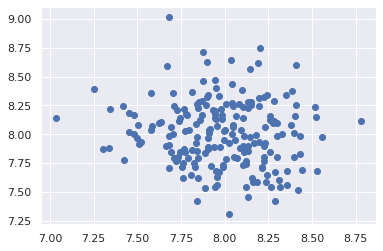

OneClassSVM(gamma=0.001, nu=0.03)


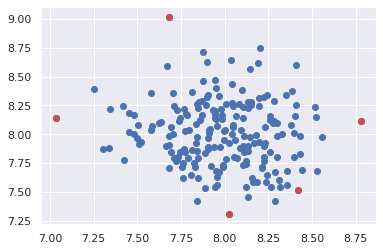

OneClassSVM(gamma=0.001, nu=0.02)
3.994389673293594


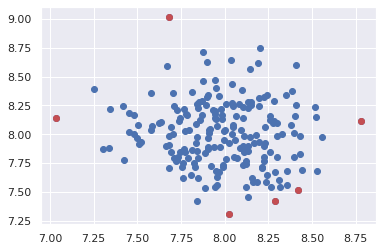

In [54]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(13)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(8, 8))

plt.scatter(x[:,0], x[:,1])
plt.show()

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

svm.fit(x)
pred = svm.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
print(svm)

pred = svm.fit_predict(x)
scores = svm.score_samples(x)

thresh = quantile(scores, 0.03)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()